<a href="https://colab.research.google.com/github/drak247/MPA-MLF_230070_Havrda/blob/main/MPA_MLF_PCA_2_students_LAB_4_230070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [5]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R=np.matmul(X,X.transpose())/3

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

print("u1=",u1)
print("u2=",u2)
# Calculate the coordinates in new orthonormal basis:

X_proj=np.dot(U.T,X)
X_proj[1,:] = 0
print("X_proj=",X_proj)
# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original
X_reconstructed=np.dot(U,X_proj)
print("X_reconstructed=",X_reconstructed)

u1= [-0.40455358 -0.9145143 ]
u2= [-0.9145143   0.40455358]
X_proj= [[-4.46716435 -3.14809647  0.        ]
 [ 0.          0.          0.        ]]
X_reconstructed= [[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]


# PCA on Iris data

In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

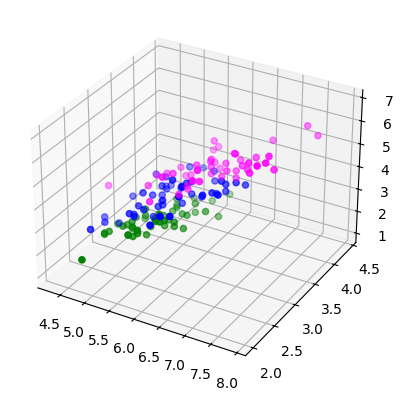

In [6]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
1.273055734903513e-16
0.9140304714680705


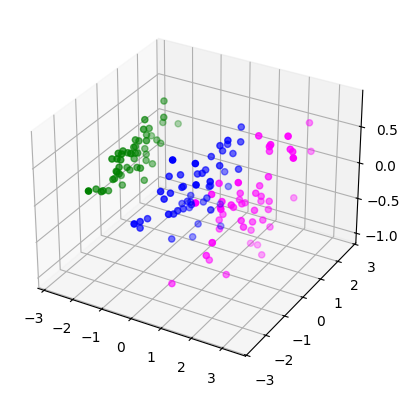

In [24]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show
#print(np.min(Xpp[:,1]))
#print(np.max(Xpp[:,1]))
print(np.mean(Xpp[:,1]))
print(np.var(Xpp[:,1]))

[[ 0.05290845 -0.00491134  0.05999602  0.05975355]
 [-0.00491134  0.03298254 -0.02328082 -0.02111795]
 [ 0.05999602 -0.02328082  0.08952249  0.09149784]
 [ 0.05975355 -0.02111795  0.09149784  0.10086914]]
0.0
1.0


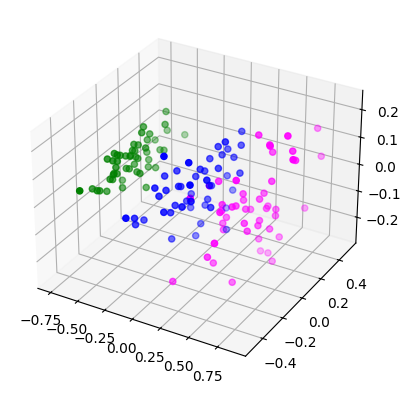

In [59]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show
print(np.min(Xpp[:,1]))
print(np.max(Xpp[:,1]))
#print(np.mean(Xpp[:,1]))
#print(np.var(Xpp[:,1]))

In [27]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [26]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

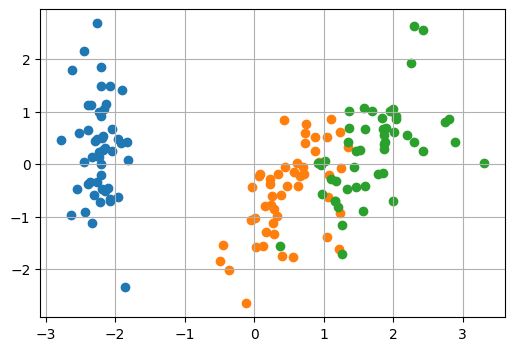

In [31]:
# Plot the principal components in 2D, mark different targets in color
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
for target_name in np.unique(y):
    plt.scatter(Xpp[y == target_name, 0],   #Xpp standart, Xpca MinMax
                Xpp[y == target_name, 1],
                label=target_name)
plt.grid()
plt.show()

# KNN classifier

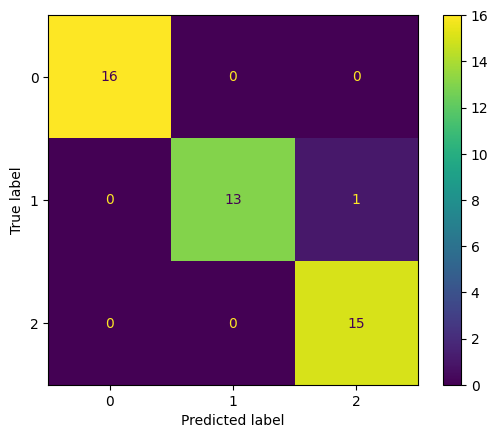

In [60]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# Xpp full

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xpp,y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



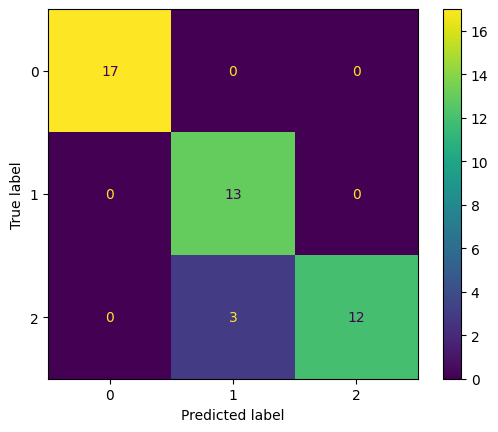

In [61]:
#Xpca full
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xpca,y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

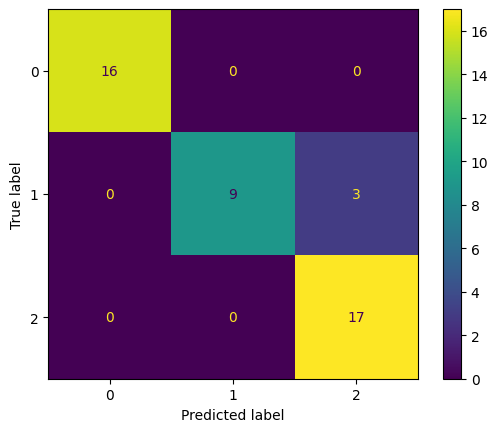

In [62]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
#Xpca reduced by last dimension

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xpca[:, :2],y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train2,y_train2)
Ypred2=knn1.predict(X_test2)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test2,Ypred2)
ConfusionMatrixDisplay.from_predictions(y_test2,Ypred2)


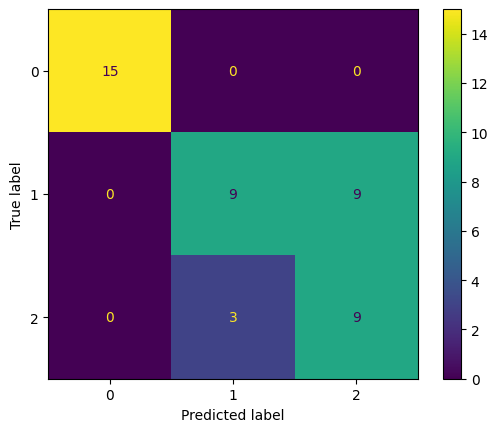

In [63]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
#Xpp reduced by last dimension
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(Xpp[:, :2],y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train3,y_train3)
Ypred3=knn1.predict(X_test3)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test3,Ypred3)
ConfusionMatrixDisplay.from_predictions(y_test3,Ypred3)

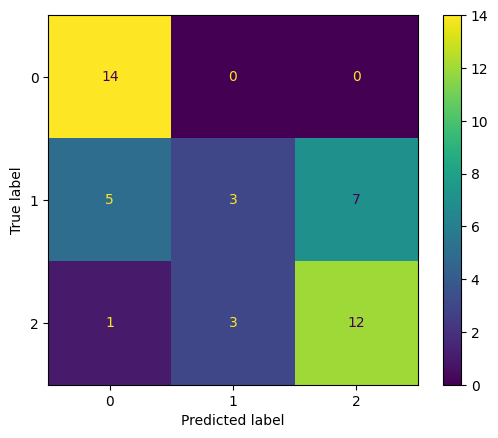

In [64]:
#original X first two colum
#Xpp reduced by 2 last features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(Xpp[:, :1],y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train3,y_train3)
Ypred3=knn1.predict(X_test3)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test3,Ypred3)
ConfusionMatrixDisplay.from_predictions(y_test3,Ypred3)

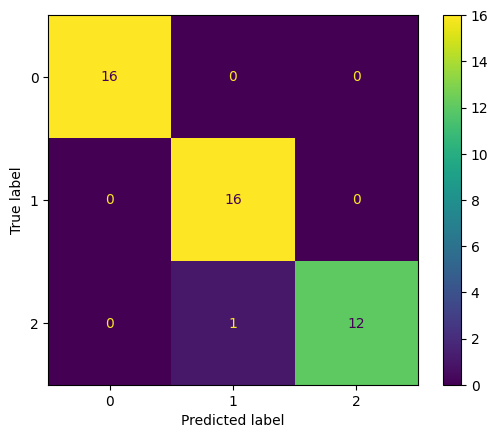

In [65]:
#original X first two colum
#Xpca reduced by 2 last features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(Xpca[:, :1],y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train3,y_train3)
Ypred3=knn1.predict(X_test3)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test3,Ypred3)
ConfusionMatrixDisplay.from_predictions(y_test3,Ypred3)

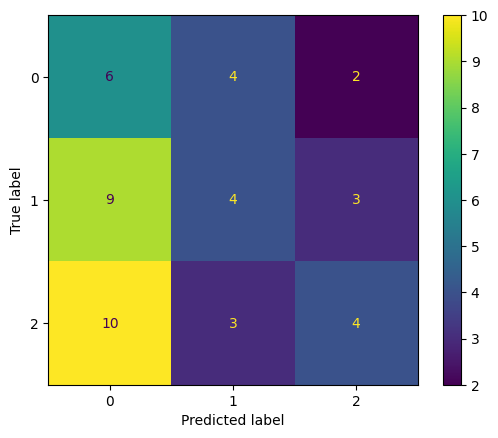

In [66]:
#Xpca reduced by 2 first features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(Xpca[:, 2:3],y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train3,y_train3)
Ypred3=knn1.predict(X_test3)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test3,Ypred3)
ConfusionMatrixDisplay.from_predictions(y_test3,Ypred3)

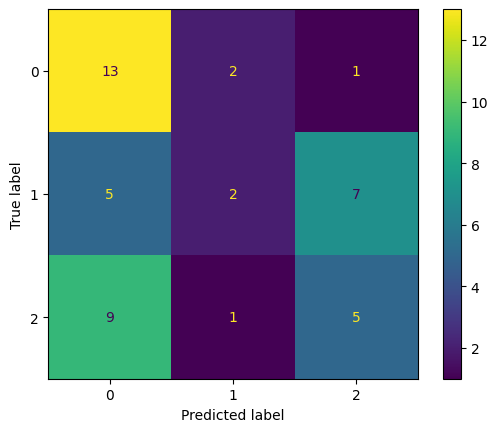

In [58]:
#Xpca reduced by 2 first features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(Xpp[:, 2:3],y,test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train3,y_train3)
Ypred3=knn1.predict(X_test3)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test3,Ypred3)
ConfusionMatrixDisplay.from_predictions(y_test3,Ypred3)